In [1]:
import argparse
import os
import numpy as np
from unityagents import UnityEnvironment
from default import get_cfg_defaults

parser = argparse.ArgumentParser(description="Banana Game Collector Setup")
parser.add_argument(
    "--config-file",
    default=None,
    metavar="FILE",
    help="path to config file",
    type=str,
    )
parser.add_argument(
        "opts",
        help="Modify config options using the command-line",
        default=None,
        nargs=argparse.REMAINDER,
    )
args = parser.parse_args([])

In [2]:
"""
Setup all required settings
"""
cfg = get_cfg_defaults()
if args.config_file is not None:
    cfg.merge_from_file(args.config_file)
if args.opts is not None:
    cfg.merge_from_list(args.opts)
cfg.freeze()
env = UnityEnvironment(file_name=cfg.SYSTEM.GAME_LOC)

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
if cfg.SYSTEM.DEVICE is not "":
    print("Use GPU")
    os.environ["CUDA_VISIBLE_DEVICES"] = str(cfg.SYSTEM.DEVICE)
else:
    print("Use CPU")


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

"""
Test the Game with random player
"""
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
print("Score: {}".format(score))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Use CPU
Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
Score: 0.0


In [17]:
import tensorflow as tf
import tensorflow.nn as F
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

class MLPArchitecture(models.Model):
    def __init__(self, n_outputs, **kwargs):
        super(MLPArchitecture, self).__init__(**kwargs)
        
        self.d1 = layers.Dense(units=128)
        self.d2 = layers.Dense(units=32)
        self.d3 = layers.Dense(units=n_outputs)
    
    def call(self, inputs):
        x = F.relu(self.d1(inputs))
        x = F.relu(self.d2(x))
        return F.softmax(self.d3(x))
    
class NNModel():
    def __init__(self, state_size, action_size, batch_size, learning_rate=1e-3):
        
        input_layer = tf.keras.layers.Input(shape=(state_size,))
        module = MLPArchitecture(n_outputs=action_size)(input_layer)
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        with tf.variable_scope("local_net"):
            self.local_model = models.Model(inputs=input_layer, outputs=module)
            self.local_model.compile(loss="categorical_crossentropy")
        with tf.variable_scope("target_net"):
            self.target_model = models.Model(inputs=input_layer, outputs=module)
        
    def train(self):
        pass
    
    def predict(self):
        pass
    
    def copy_weights_from(self):
        pass
    
    def get_loss(y_true, y_pred):
        

In [23]:
model.add_loss()
#model.compile(optimizer="adam")

ValueError: The model cannot be compiled because it has no loss to optimize.

In [3]:
# model.py
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections.abc import Iterable


class MLPArchitecture(nn.Module):
    def __init__(self, batch_size, n_outputs, state_size):
        super(MLPArchitecture, self).__init__()
        if isinstance(state_size, Iterable):
            assert len(state_size)==1
            state_size = state_size[0]
        self.batch_size = batch_size
        self.n_outputs = n_outputs
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(state_size, 128) 
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, n_outputs)        
    
    def forward(self, x):
        h = self.relu(self.fc1(x))
        h = self.relu(self.fc2(h))
        out = self.fc3(h)
        return out

    
class CNNArchitecture(nn.Module):
    def __init__(self, batch_size, n_outputs, state_size):
        super(CNNArchitecture, self).__init__()
        self.batch_size = batch_size
        self.n_outputs = n_outputs
        
        self.conv1 = nn.Conv2d(state_size[-1], 32, kernel_size=5, stride=3, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(64*7*7, 50)
        self.fc2 = nn.Linear(50, n_outputs)
        self.relu = nn.ReLU()    
    
    def forward(self, x):
        x = x.permute(0,3,1,2) # fix pytorch format 0 1 2 3 4 5 6 7 8 9
        h = self.relu(self.conv1(x))
        h = self.relu(self.conv2(h))
        h = self.relu(self.conv3(h))
        
        h = h.view(-1, 64*7*7)
        
        h = self.relu(self.fc1(h))
        out = self.relu(self.fc2(h))
        return out

class NNModel():
    def __init__(self, arch, batch_size, n_outputs, state_shape, learning_rate=1e-3):
        self.net=arch(batch_size, n_outputs, state_shape)
        self.optimizer = optim.Adam(self.net.parameters(), lr=learning_rate)
        
    def get_loss(self, y, y_hat):
        return nn.MSELoss()(y.detach(), y_hat).mean()
    
    def train(self, batch_x, batch_y, actions):
        batch_x = torch.from_numpy(batch_x).float()
        batch_y = torch.from_numpy(batch_y).float()
        actions = torch.from_numpy(actions).long()
        y_hat = self.net.forward(batch_x)
        loss = self.get_loss(batch_y, y_hat.gather(1, actions))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        
    def predict(self, batch_x, is_tensor=False):
        if not is_tensor:
            batch_x = torch.from_numpy(batch_x).float()
        prediction = self.net.forward(batch_x)
        return prediction.detach().numpy()
    
    def copy_weights_from(self, net, tau=0.001):
        # tau should be a small parameter
        for local_param, ext_param in zip(self.net.parameters(), net.parameters()):
            local_param.data.copy_((1-tau)*(local_param.data) + (tau)*ext_param.data)

In [4]:
# agent.py
import numpy as np
import random

from utils import ExperienceReplay
#from model import NNModel
class QAgent():
    def __init__(self, n_actions, state_size, architecture, epsilon_exp_decay=0.999, epsilon_final=0.05, 
                 gamma=0.99, exp_replay_size = int(1e5), batch_size=128, initial_exploration_steps = 1e4,
                 tau = 1e-3, learning_rate=1e-3, update_every=1):
        self.epsilon = 1.0
        self.epsilon_final = epsilon_final
        self.eps_decay = epsilon_exp_decay
        self.n_actions = n_actions
        self.state_size = state_size
        self.gamma = gamma
        self.exp_replay = ExperienceReplay(size=exp_replay_size)
        self.batch_size = batch_size
        self.neural_net = NNModel(arch=architecture, batch_size=self.batch_size, n_outputs=n_actions, state_shape=state_size, learning_rate=learning_rate)
        self.target_net = NNModel(arch=architecture, batch_size=self.batch_size, n_outputs=n_actions, state_shape=state_size, learning_rate=learning_rate)
        self.initial_exploration_steps = initial_exploration_steps
        self.tau = tau
        self.update_every = update_every
        self.c = 0  
    
    def choose_action(self, state, greedy=False):
        q_values = self._get_q_values(state, use_target_net=False)
        best_action = np.argmax(q_values)
        if greedy:
            # Choose the greedy action
            action = best_action
        else:
            # Perform epsilon-greedy and update epsilon
            if random.random() > self.epsilon:
                action = best_action
            else:
                action = random.choice(range(self.n_actions))
        return action
    
    def _update_epsilon(self):
        # Epsilon exponential decay
        self.epsilon =  self.eps_decay * self.epsilon + (1-self.eps_decay)*self.epsilon_final
        
    def _get_q_values(self, state, use_target_net=True):
        if len(state.shape)<=len(self.state_size):
            state = np.expand_dims(state, 0)
            
        if use_target_net:
            q_values = self.target_net.predict(state)
        else:
            q_values = self.neural_net.predict(state)
        assert q_values.shape[1] == self.n_actions
        assert len(q_values.shape) == 2
        return q_values
        
    def step(self, state, action, reward, next_state):
        self.c+=1
        # 1. Add observation to the deque
        observation = (np.squeeze(state), action, reward, np.squeeze(next_state))
        self.exp_replay.append(observation)
        
        # 2. Update the neural net
        if (self.exp_replay.length > self.initial_exploration_steps): 
            self._update_epsilon()
            if ((self.c % self.update_every)==0):
                self.c += 1
                sample = self.exp_replay.draw_sample(sample_size=self.batch_size)
                states, actions, rewards, next_states = sample
                # Train
                batch_x = states
                batch_y = rewards + self.gamma*np.max(self._get_q_values(next_states, use_target_net=True), axis=1, keepdims=True) # TD_target
                self.neural_net.train(batch_x, batch_y, actions)
                # update target net
                self.target_net.copy_weights_from(self.neural_net.net, tau=self.tau)

In [5]:
n_episodes = 1500
eps_decay=0.99995
eps_final=0.01
exploration_steps = 10000
tau = 1e-3
learning_rate = 1e-3
exp_replay_size = int(1e5)
update_every = 4
agent = QAgent(n_actions=action_size, state_size=(state_size,), architecture=MLPArchitecture,
               epsilon_exp_decay=eps_decay, epsilon_final=eps_final, batch_size=64,
               initial_exploration_steps=exploration_steps, tau = tau,
               update_every=update_every,exp_replay_size=exp_replay_size)
scores = []
eps = []

In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
ewma = lambda x: pd.Series(x).ewm(span=100).mean()
import pandas as pd

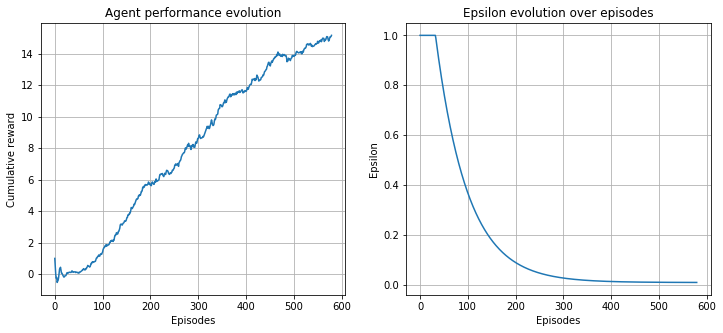

In [7]:
for i in range(n_episodes):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]  
    done=False
    episodic_score=0
    while not done:
        action = agent.choose_action(state)

        env_info = env.step(int(action))[brain_name]
        reward = env_info.rewards[0]
        next_state = env_info.vector_observations[0]
        done = env_info.local_done[0] 

        agent.step(state=state, action=action, reward=reward, next_state=next_state)
        state = next_state
        episodic_score += reward
    eps.append(agent.epsilon)
    scores.append(episodic_score)
    if i % 100 == 0:
        torch.save(agent.neural_net.net.state_dict(), 'checkpoint.pth')
    
    clear_output(True)
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(ewma(scores))
    plt.grid()
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative reward")
    plt.title("Agent performance evolution")
    plt.subplot(122)
    plt.plot(eps)
    plt.grid()
    plt.xlabel("Episodes")
    plt.ylabel("Epsilon")
    plt.title("Epsilon evolution over episodes")
    plt.show()
    if np.mean(scores[-100:]) >= 15: # We will consider the environment solved when it overcomes a score of 15.
        break # Env solved